In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Network creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

#Stop overfitting
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

#Regression Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Classification Evaluation
from sklearn.metrics import classification_report, confusion_matrix

#Save the model
from tensorflow.keras.models import load_model

In [3]:
#RNN: generate a time series
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
import warnings
warnings.filterwarnings('ignore')

## 1. ANN (Regression)

#### Multiclass Classification Considerations
There are 2 main types of multi-class situations:

1) Non Exclusive Classes: <br>
A data point can have multiple classes assigned to it. <br>
Ex: photos can have multiple tags (beach, family, vacation,...).<br>
            ===> Sigmoid activation function for the output layer
            
2) Mutually Exclusive Classes:<br>
Only one class per data point. <br>
Ex: a photo can be either in gray scale or colot.<br>
            ===> Softmax activation function for the output layer

In [12]:
df = pd.read_csv(r"C:\Users\oula.aabkari\Documents\5. Keras-Udemy-Portilla\DATA\fake_reg.csv")
df.head(2)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403


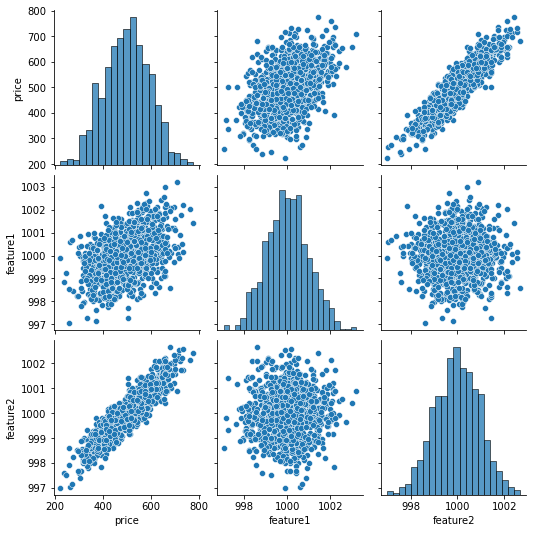

In [13]:
sns.pairplot(df);

#### Data Preprocessing

In [22]:
#Train Test Split
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [23]:
#Scaling the data (we only need to scale the features)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model creation

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [42]:
#Creating the model
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1)) #final layer

model.compile(optimizer='rmsprop',loss='mse')

#### Model Training

In [44]:
#Fitting the model 
model.fit(X_train,y_train,epochs=250,verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 259019.3594
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 258935.7188
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 258868.7500
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 258806.9688
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 258751.1094
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 258697.4844
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 258643.6094
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 258584.5000
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 258517.6875
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 258441.7812
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 258355.7188
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 27.3791
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 26.9365
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 26.8587
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 26.4590
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 25.8895
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 26.1836
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 25.9813
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 25.4501
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 25.6029
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 25.3157
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 25.5430
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 25.5506
Epoch 205/250
22/2

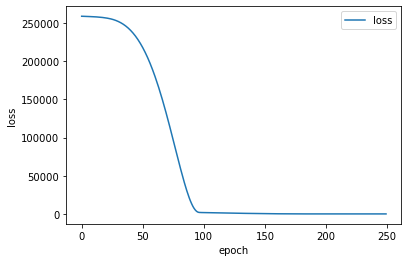

In [45]:
#Take a look at the training history
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(xlabel='epoch',ylabel='loss');

In [49]:
loss_df.iloc[249]

loss    25.246716
Name: 249, dtype: float64

#### Predicting and Evaluation

In [51]:
#Output the metric loss we decided (in this case: mse)
model.evaluate(X_test,y_test,verbose=0)

23.117748260498047

In [57]:
y_pred = model.predict(X_test).reshape(len(y_pred),)

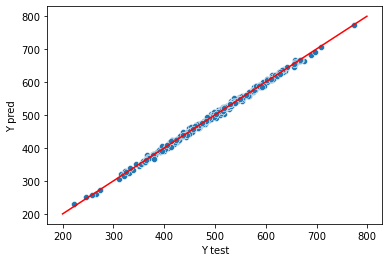

In [75]:
pred_df = pd.DataFrame({'Y test':y_test.reshape(len(y_test),), 'Y pred':y_pred})
sns.scatterplot(x='Y test',y='Y pred',data=pred_df)
sns.lineplot(x=np.arange(200,800),y=np.arange(200,800),color='red');

In [77]:
#On average, my prediction is about 4 dollars off
mean_absolute_error(pred_df['Y test'],pred_df['Y pred'])

3.804972526257704

In [79]:
#same output as model.evaluate(X_test,y_test)
mean_squared_error(pred_df['Y test'],pred_df['Y pred'])

23.11774046273703

In [ ]:
#Save the model
model.save('mymodel.h5')

#Load the model later on
mymodel = load_model('mymodel.h5')

### ========================================================================================
### 2. ANN (Classification)

#### Early Stopping & Dropout Layers

Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit() call.

Dropout can be added to layers to "turnoff" neurons during training to prevent overfitting.<br>
Each dropout layer will drop a user-defined % of the neuron units in the previous layer every batch.

In [105]:
df = pd.read_csv(r"C:\Users\oula.aabkari\Documents\5. Keras-Udemy-Portilla\DATA\cancer_classification.csv")
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


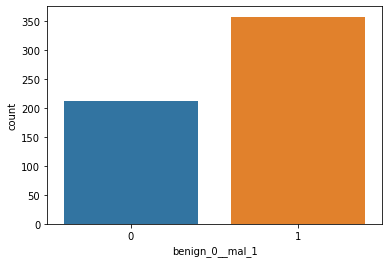

In [107]:
#do a countplot of the labels to see if it's a well balanced problem or not
sns.countplot(x='benign_0__mal_1',data=df);

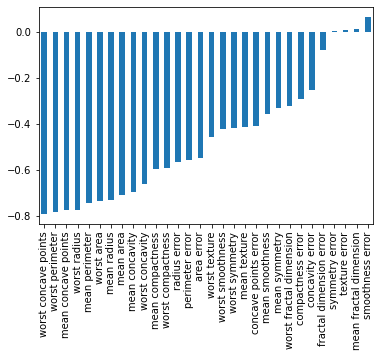

In [110]:
#Checkout the correlation
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar');

In [111]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [113]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
X_train.shape

(426, 30)

In [132]:
#==========================SIMPLE MODEL===============================
model1 = Sequential()
    
model1.add(Dense(30,activation='relu')) #1st layer units = no. of features
model1.add(Dense(15,activation='relu'))

#Binary classification ==> Output layer activation should be sigmoid
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam')

#We set epochs = 600 as a big value to make the model overfit
model1.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6862 - val_loss: 0.6476
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6412 - val_loss: 0.6198
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6033 - val_loss: 0.5872
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5614 - val_loss: 0.5519
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5149 - val_loss: 0.5012
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4607 - val_loss: 0.4551
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4086 - val_loss: 0.3978
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3573 - val_loss: 0.3566
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3176 - val_loss: 0.3218
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2860 - val_loss: 0.2885
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.1287
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.1279
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0620 - val_loss: 0.1282
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.1291
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.1287
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.1289
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.1288
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.1279
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.1296
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.1279
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.1380
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0394 - val_loss: 0.1385
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0417 - val_loss: 0.1419
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0403 - val_loss: 0.1395
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.1379
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0392 - val_loss: 0.1406
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.1380
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0388 - val_loss: 0.1400
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0385 - val_loss: 0.1398
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0412 - val_loss: 0.1384
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.1736
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.1650
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.1699
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.1729
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.1632
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.2176
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.1683
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.1776
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.1673
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.1685
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.2190
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.2079
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.2387
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.2070
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.2286
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.2119
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.2194
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.2190
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.2226
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.2143
Epoc

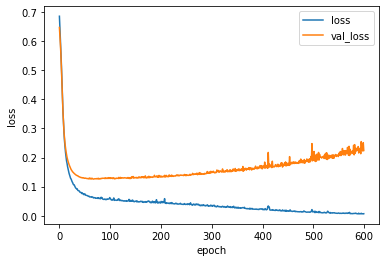

In [133]:
#We can clearly see the overfitting since loss_validation >> loss_training
loss_df = pd.DataFrame(model1.history.history)
loss_df.plot(xlabel='epoch',ylabel='loss');

In [134]:
#====================EARLY STOPPING=======================================
#We'll use early stopping to stop the training based on the validation loss
#monitor: what metric we're tracking (loss? accuarcy?)
#mode: we want to minimize loss / maximize accuracy
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model2 = Sequential()
    
model2.add(Dense(30,activation='relu'))
model2.add(Dense(15,activation='relu'))

#Binary classification ==> Output layer activation should be sigmoid
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam')

model2.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7089 - val_loss: 0.6869
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6507 - val_loss: 0.6383
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5939 - val_loss: 0.5893
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5434 - val_loss: 0.5409
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4882 - val_loss: 0.4782
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4285 - val_loss: 0.4182
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3711 - val_loss: 0.3677
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3239 - val_loss: 0.3232
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2847 - val_loss: 0.2881
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2556 - val_loss: 0.2599
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0965
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0959
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0996
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.0963
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0975
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.0952
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0490 - val_loss: 0.0986
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0957
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0947
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0942
Epoch 93/600


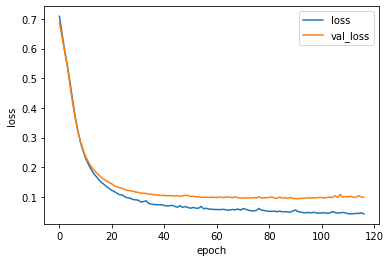

In [135]:
#Now we can't see overfitting
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot(xlabel='epoch',ylabel='loss');

In [136]:
#====================DROPOUT CALL + EARLY STOPPING====================
model3 = Sequential()
    
model3.add(Dense(30,activation='relu')) #1st layer units = no. of features
model3.add(Dropout(0.5)) #turn off 20~50% of the neurons randomly during each batch

model3.add(Dense(15,activation='relu'))
model3.add(Dropout(0.5))

#Binary classification ==> Output layer activation should be sigmoid
model3.add(Dense(1,activation='sigmoid'))

model3.compile(loss='binary_crossentropy',optimizer='adam')

model3.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7260 - val_loss: 0.6847
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7047 - val_loss: 0.6677
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6574 - val_loss: 0.6521
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6516 - val_loss: 0.6355
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6422 - val_loss: 0.6141
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6051 - val_loss: 0.5886
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5879 - val_loss: 0.5695
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5540 - val_loss: 0.5329
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5282 - val_loss: 0.4976
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4932 - val_loss: 0.4637
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1191
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1237 - val_loss: 0.1196
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1158 - val_loss: 0.1184
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1117 - val_loss: 0.1181
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1143
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1160
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1164 - val_loss: 0.1161
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1195 - val_loss: 0.1141
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1113 - val_loss: 0.1132
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.1177
Epoch 93/600


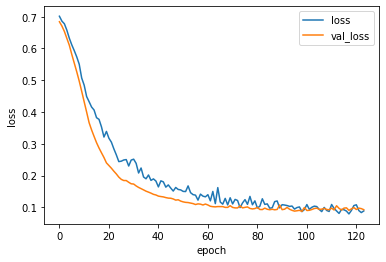

In [131]:
#We can see that the model is learning on more epochs due to dropping out some neurons
#behavior is much more improved, as the training loss and validation loss are converging!!
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot(xlabel='epoch',ylabel='loss');

In [204]:
#===============COMPARING THE 3 MODELS==========================

#For Binary Classifications (Using sigmoid in last layer)
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")
y_pred3 = (model3.predict(X_test) > 0.5).astype("int32")

#For Multi-Class Classification problem, using "softmax" activation for the last layer
#y_pred = np.argmax(model.predict(X_test), axis=1)

In [205]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.96      0.99      0.98        81

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [206]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.98      0.99      0.98        81

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [207]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.99      0.99      0.99        81

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



### ===================================================================================
### 3. RNN on a SIN Wave

RNN are effective for use with sequence data: time-stamped sales data, sequence of text, heart beat data, ...<br>
Objective: learn from historical information and forecast into the unknown future.<b> The order is important in RNNs!<br></b>

RNNs feed into each neuron the output of the previous neuron along with the neuron's new input information.

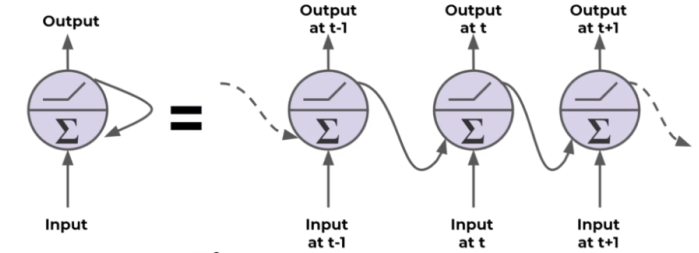

- Step1: Dividing the data into a training set and a test set (Ex: 1 year training, 1 month testing).
- Step2: Once we're confident about the accuracy of out model. We include our test set data in the training data and retrain our model.
- step3: We forecast beyong the scope of our original data (and confirm our model in the future).

#### 3.1 RNN using SimpleRNN

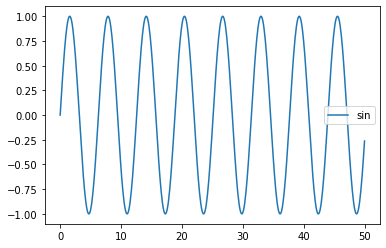

In [303]:
x = np.linspace(0,50,501)
y = np.sin(x)

df = pd.DataFrame(data=y,index=x,columns=['sin'])
df.plot();

In [343]:
df.head(2)

,sin
0.0,0.000000
0.1,0.099833


In [304]:
#Train Test split: decide what % to use for the testing range
test_percent = 0.1
len_test = int(np.round(len(df)*test_percent,decimals=0))
test_idx = len(df) - len_test

train = df.iloc[:test_idx,:]
test = df.iloc[test_idx:,:]

In [291]:
#Scale the data
#for RNN, we'll eventually be feeding the output back to itself, so we need to scale
#the train data, which is basically out y data
#Basically in RNN train = x_train = y_train

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [310]:
#Generate batches of sequence data
length = 50
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=1)

print('length of generator: ',len(generator))
print('length of training data: ',len(train_scaled))

length of generator:  401
length of training data:  451


In [311]:
X,y = generator[0]

print(X)
print(y)

[[[4.99999116e-01]
  [5.49916225e-01]
  [5.99334579e-01]
  [6.47760405e-01]
  [6.94709850e-01]
  [7.39713809e-01]
  [7.82322618e-01]
  [8.22110545e-01]
  [8.58680040e-01]
  [8.91665714e-01]
  [9.20737985e-01]
  [9.45606372e-01]
  [9.66022399e-01]
  [9.81782075e-01]
  [9.92727935e-01]
  [9.98750612e-01]
  [9.99789928e-01]
  [9.95835500e-01]
  [9.86926839e-01]
  [9.73152957e-01]
  [9.54651478e-01]
  [9.31607263e-01]
  [9.04250562e-01]
  [8.72854714e-01]
  [8.37733417e-01]
  [7.99237589e-01]
  [7.57751870e-01]
  [7.13690771e-01]
  [6.67494535e-01]
  [6.19624741e-01]
  [5.70559686e-01]
  [5.20789614e-01]
  [4.70811810e-01]
  [4.21125636e-01]
  [3.72227539e-01]
  [3.24606094e-01]
  [2.78737119e-01]
  [2.35078919e-01]
  [1.94067715e-01]
  [1.56113277e-01]
  [1.21594831e-01]
  [9.08572769e-02]
  [6.42077324e-02]
  [4.19124713e-02]
  [2.41942605e-02]
  [1.12301346e-02]
  [3.14962674e-03]
  [3.34747619e-05]
  [1.91281421e-03]
  [8.76886734e-03]]]
[[0.02053313]]


- If length=50, We basically tell our model, given 50 points x1, x2 of the dataset, try to predict the 51st point y (which is also x51 of our dataset).
- The generator will keep generating X and y so len(generator) = len(train) - 50
- length parameter shouldn't be a random choice, it should be enough for the network to pickup on any trend.
- For our current sin wave, 50 points should allow us to see a full cycle, so we set length = 50.
- If it's a yearly holiday cycle we're trying to predict, we need to include the entire year in our length variable.

In [313]:
#Model Creation
n_features = 1

model = Sequential()

#better have number of units = length of each batch = 50
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))

#loss function for continuous values = mse
model.compile(optimizer='adam', loss='mse')

In [314]:
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 2s 4ms/step - loss: 0.0269
Epoch 2/5
401/401 [==============================] - 2s 4ms/step - loss: 4.2398e-05
Epoch 3/5
401/401 [==============================] - 2s 4ms/step - loss: 3.4545e-05
Epoch 4/5
401/401 [==============================] - 2s 4ms/step - loss: 0.0013
Epoch 5/5
401/401 [==============================] - 2s 4ms/step - loss: 3.8900e-05


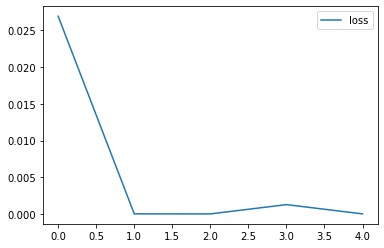

In [315]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [318]:
#to predict the 1st point in my test set, we need the last 50 points of the training set
first_eval_batch = train_scaled[-length:,:].reshape(1,length,n_features)

print('prediction of y0: ',model.predict(first_eval_batch))
print('actual y0: ',test_scaled[0])

prediction of y0:  [[0.9477192]]
actual y0:  [0.94955134]


In [319]:
model.predict(first_eval_batch).flatten()

array([0.9477192], dtype=float32)

In [320]:
train_scaled[-length:,:].shape

(50, 1)

In [321]:
#Put the above logic into a for loop
first_eval_batch = train_scaled[-length:,:].reshape(1,length,n_features)

current_batch = first_eval_batch

predictions = []

for i in range(length):
    #we use the last 50 real data points to predict our next point
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    
    #we're basically predicting off predictions adding one point at a time
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

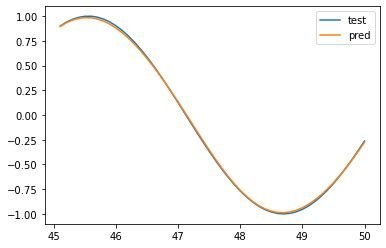

In [326]:
true_predictions = scaler.inverse_transform(predictions)

df_pred = pd.DataFrame({'test':test['sin'],'pred':true_predictions.flatten()})

df_pred.plot();

#### 3.2 RNN using LSTM

We try to improve the previous model using both LSTM and EarlyStopping

In [334]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

#Generator needs to have a length < test set
length = 49
generator = TimeseriesGenerator(train_scaled,train_scaled,
                                length=length,batch_size=1)
validation_generator = TimeseriesGenerator(test_scaled,test_scaled,
                                           length=length,batch_size=1)

In [335]:
#Model Creation
n_features = 1

model = Sequential()

#better have number of units = length of each batch = 50
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

#loss function for continuous values = mse
model.compile(optimizer='adam', loss='mse')

In [336]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 6s 12ms/step - loss: 0.0248 - val_loss: 4.9686e-04
Epoch 2/20
402/402 [==============================] - 5s 12ms/step - loss: 1.1170e-04 - val_loss: 6.5555e-06
Epoch 3/20
402/402 [==============================] - 5s 12ms/step - loss: 4.7781e-04 - val_loss: 1.5562e-05
Epoch 4/20
402/402 [==============================] - 5s 12ms/step - loss: 2.2873e-04 - val_loss: 1.8651e-05


In [339]:
#Put the above logic into a for loop
first_eval_batch = train_scaled[-length:,:].reshape(1,length,n_features)

current_batch = first_eval_batch

predictions = []

for i in range(len(test)):
    #we use the last 50 real data points to predict our next point
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    
    #we're basically predicting off predictions adding one point at a time
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

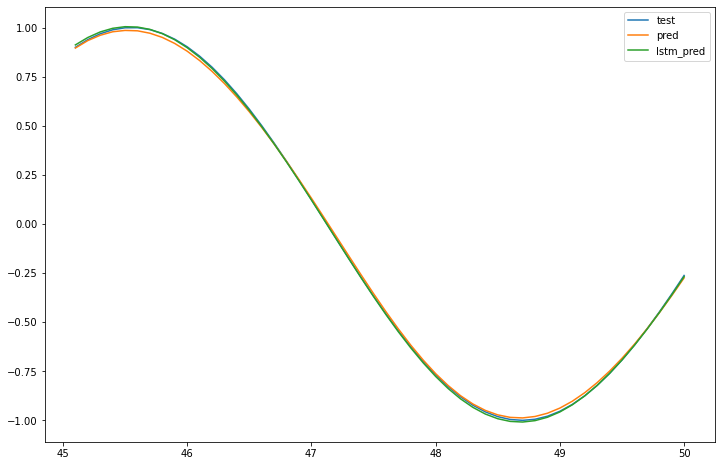

In [341]:
true_predictions = scaler.inverse_transform(predictions)

df_pred['lstm_pred'] = true_predictions 

#We can see that the lstm performs better
df_pred.plot(figsize=(12,8));

#### Forecasting into the Future

In [349]:
#Retrain everything and forecast into the future
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

length = 50
generator = TimeseriesGenerator(data_scaled,data_scaled,length=length,batch_size=1)

In [350]:
#Model Creation
n_features = 1

model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

#loss function for continuous values = mse
model.compile(optimizer='adam', loss='mse')

In [352]:
model.fit(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 8s 17ms/step - loss: 6.1454e-04
Epoch 2/6
451/451 [==============================] - 6s 13ms/step - loss: 3.9275e-05
Epoch 3/6
451/451 [==============================] - 6s 13ms/step - loss: 1.7542e-05
Epoch 4/6
451/451 [==============================] - 6s 13ms/step - loss: 2.1049e-05
Epoch 5/6
451/451 [==============================] - 6s 12ms/step - loss: 5.9734e-06
Epoch 6/6
451/451 [==============================] - 6s 12ms/step - loss: 2.7954e-04


In [358]:
#Put the above logic into a for loop
first_eval_batch = data_scaled[-length:,:].reshape(1,length,n_features)
current_batch = first_eval_batch

forecast = []

for i in range(len(test)):
    #we use the last 50 real data points to predict our next point
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    
    #we're basically predicting off predictions adding one point at a time
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

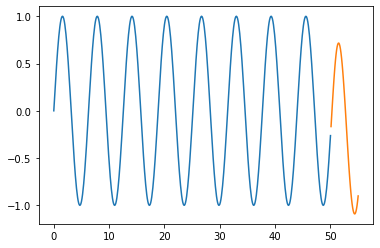

In [359]:
forecast = scaler.inverse_transform(forecast)

x_forecast = np.arange(50.1,55.1,step=0.1)

#We can see that the lstm performs better
plt.plot(df.index,df['sin'])
plt.plot(x_forecast,forecast);

===================================================================================
### 4. RNN on Time Series

In [5]:
path = r"C:\Users\oula.aabkari\Documents\5. Keras-Udemy-Portilla\DATA\RSCCASN.csv"
df = pd.read_csv(path,parse_dates=True,index_col='DATE')
df.columns=['Sales']

In [6]:
len(df)

334

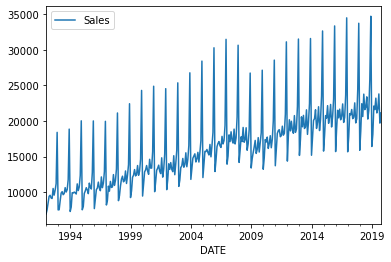

In [6]:
df.plot();

In [16]:
#we set the test size as 1.5 years data --> 18 data points
test_size = 18

train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

In [17]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [111]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2)
#when I use early stopping here the model trains for only 3 epochs giving bad results

#batch size should be < len(test)
length = 12

generator = TimeseriesGenerator(train_scaled,train_scaled,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(test_scaled,test_scaled,length=length,batch_size=1)

In [112]:
#Model Creation
n_features = 1

model = Sequential()

#better have number of units = length of each batch = 50
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))

model.add(Dense(1))

#loss function for continuous values = mse
model.compile(optimizer='adam', loss='mse')

In [9]:
1*30*24*60/393111*100

10.989262574692644

In [113]:
model.fit(generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
304/304 [==============================] - 2s 4ms/step - loss: 0.0272 - val_loss: 0.0027
Epoch 2/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0030
Epoch 3/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0420
Epoch 4/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 5/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 6/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0018 - val_loss: 5.0347e-04
Epoch 7/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0014 - val_loss: 2.4465e-04
Epoch 9/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0016 - val_loss: 7.0844e-04
Epoch 10/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0016 - val_

<AxesSubplot:>

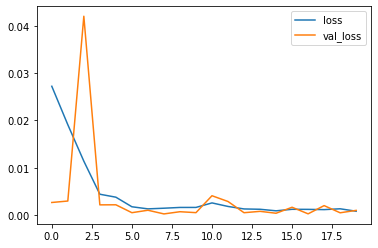

In [114]:
#It seems liek 8 epochs is a good number
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [115]:
#Put the above logic into a for loop
first_eval_batch = train_scaled[-length:,:].reshape(1,length,n_features)

current_batch = first_eval_batch

predictions = []

for i in range(len(test)):
    #we use the last 50 real data points to predict our next point
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    
    #we're basically predicting off predictions adding one point at a time
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

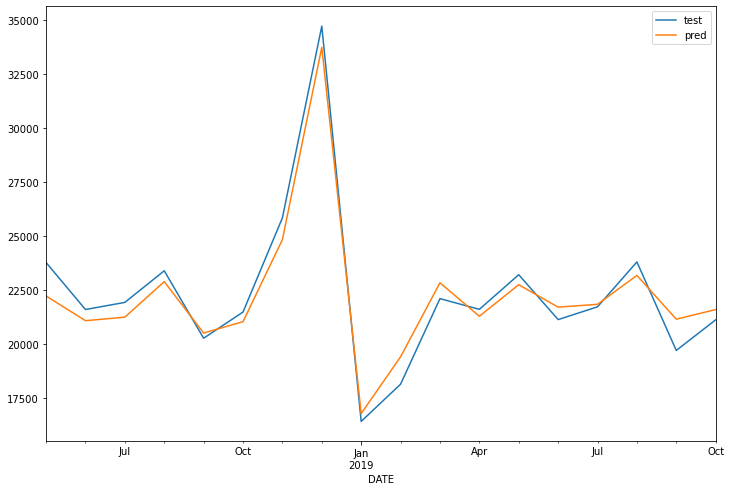

In [116]:
true_predictions = scaler.inverse_transform(predictions)

df_pred = pd.DataFrame({'test':test.values.flatten(),'pred':true_predictions.flatten()},index=test.index)

#We can see that the lstm performs better
df_pred.plot(figsize=(12,8));

#### Forecast into the future

In [119]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

length = 12
generator = TimeseriesGenerator(data_scaled,data_scaled,length=length,batch_size=1)

#Model Creation
n_features = 1

model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=8)

Epoch 1/8
322/322 [==============================] - 2s 3ms/step - loss: 0.0252
Epoch 2/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0164
Epoch 3/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0099
Epoch 4/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 5/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 6/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 7/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 8/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0013


In [120]:
first_eval_batch = data_scaled[-length:,:].reshape(1,length,n_features)

current_batch = first_eval_batch

forecast = []

for i in range(length):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    
    #we're basically predicting off predictions adding one point at a time
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

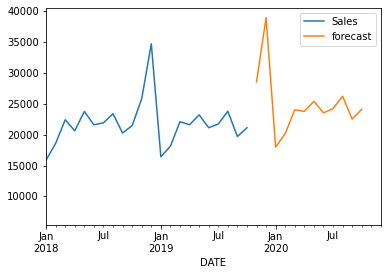

In [144]:
true_forecast = scaler.inverse_transform(forecast)

forecast_idx = pd.date_range(start='2019-11-01',periods=12,freq='MS')
df_forecast = pd.DataFrame(data=true_forecast,index=forecast_idx,columns=['forecast'])

#We can see that the lstm performs better
ax = df.plot()
df_forecast.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01');

In [138]:
df_forecast

,0
2019-11-01,28543.013373
2019-12-01,38941.640470
2020-01-01,17976.357035
2020-02-01,20171.229705
2020-03-01,24029.193328
2020-04-01,23764.711374
2020-05-01,25394.360995
2020-06-01,23519.602387
2020-07-01,24217.265853
2020-08-01,26220.049894


### 5. LSTM with Multivariate Series

- With multivariate timeseries we want to forecast more than 1 variable?
- It is very difficult to get good performance from an LSTM based RNN model for multivariate series
- Alternative simpler models: SARIMAX and VARMAX

In [ ]:
# define model
model = Sequential()

#1st change is input_shape 
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

#2nd change is dense layer units (2D)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')